In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('loan_data.csv')

In [3]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [4]:
# Drop unwanted columns
columns_to_drop = ['loan_int_rate','loan_percent_income','cb_person_cred_hist_length','credit_score','previous_loan_defaults_on_file']
df = df.drop(columns=columns_to_drop)

In [5]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,1


In [6]:
df.dtypes

person_age               float64
person_gender             object
person_education          object
person_income            float64
person_emp_exp             int64
person_home_ownership     object
loan_amnt                float64
loan_intent               object
loan_status                int64
dtype: object

In [7]:
df.loan_status.value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [8]:
df.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,1.000000


In [9]:
df.dtypes

person_age               float64
person_gender             object
person_education          object
person_income            float64
person_emp_exp             int64
person_home_ownership     object
loan_amnt                float64
loan_intent               object
loan_status                int64
dtype: object

In [10]:
df.isnull().sum()

person_age               0
person_gender            0
person_education         0
person_income            0
person_emp_exp           0
person_home_ownership    0
loan_amnt                0
loan_intent              0
loan_status              0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['person_gender'] = encoder.fit_transform(df.person_gender)
df['person_gender'].value_counts()

person_gender
1    24841
0    20159
Name: count, dtype: int64

In [12]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_status
0,22.0,0,Master,71948.0,0,RENT,35000.0,PERSONAL,1
1,21.0,0,High School,12282.0,0,OWN,1000.0,EDUCATION,0
2,25.0,0,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,1
3,23.0,0,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,1
4,24.0,1,Master,66135.0,1,RENT,35000.0,MEDICAL,1
...,...,...,...,...,...,...,...,...,...
44995,27.0,1,Associate,47971.0,6,RENT,15000.0,MEDICAL,1
44996,37.0,0,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,1
44997,33.0,1,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,1
44998,29.0,1,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,1


In [13]:
df.person_home_ownership.value_counts()

person_home_ownership
RENT        23443
MORTGAGE    18489
OWN          2951
OTHER         117
Name: count, dtype: int64

In [14]:
df.loan_intent.value_counts()

loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64

In [15]:
dummy = pd.get_dummies(df,columns=['person_home_ownership','loan_intent'], drop_first=True)

In [16]:
dummy

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,Master,71948.0,0,35000.0,1,False,False,True,False,False,False,True,False
1,21.0,0,High School,12282.0,0,1000.0,0,False,True,False,True,False,False,False,False
2,25.0,0,High School,12438.0,3,5500.0,1,False,False,False,False,False,True,False,False
3,23.0,0,Bachelor,79753.0,0,35000.0,1,False,False,True,False,False,True,False,False
4,24.0,1,Master,66135.0,1,35000.0,1,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,Associate,47971.0,6,15000.0,1,False,False,True,False,False,True,False,False
44996,37.0,0,Associate,65800.0,17,9000.0,1,False,False,True,False,True,False,False,False
44997,33.0,1,Associate,56942.0,7,2771.0,1,False,False,True,False,False,False,False,False
44998,29.0,1,Bachelor,33164.0,4,12000.0,1,False,False,True,True,False,False,False,False


In [17]:
dummy["person_education"].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [18]:
dummy["person_education"] = encoder.fit_transform(df["person_education"])

In [19]:
dummy

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,loan_status,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948.0,0,35000.0,1,False,False,True,False,False,False,True,False
1,21.0,0,3,12282.0,0,1000.0,0,False,True,False,True,False,False,False,False
2,25.0,0,3,12438.0,3,5500.0,1,False,False,False,False,False,True,False,False
3,23.0,0,1,79753.0,0,35000.0,1,False,False,True,False,False,True,False,False
4,24.0,1,4,66135.0,1,35000.0,1,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,15000.0,1,False,False,True,False,False,True,False,False
44996,37.0,0,0,65800.0,17,9000.0,1,False,False,True,False,True,False,False,False
44997,33.0,1,0,56942.0,7,2771.0,1,False,False,True,False,False,False,False,False
44998,29.0,1,1,33164.0,4,12000.0,1,False,False,True,True,False,False,False,False


In [20]:
dummy.person_education.value_counts()

person_education
1    13399
0    12028
3    11972
4     6980
2      621
Name: count, dtype: int64

In [21]:
# Compute correlation matrix
correlation_matrix = dummy.corr()

# Display correlation matrix
print(correlation_matrix)

                             person_age  person_gender  person_education  \
person_age                     1.000000       0.017528         -0.014649   
person_gender                  0.017528       1.000000         -0.002267   
person_education              -0.014649      -0.002267          1.000000   
person_income                  0.193698       0.010173          0.000331   
person_emp_exp                 0.954412       0.015078         -0.012034   
loan_amnt                      0.050750       0.010647         -0.002441   
loan_status                   -0.021476      -0.000561         -0.001747   
person_home_ownership_OTHER   -0.007321       0.002118         -0.008863   
person_home_ownership_OWN     -0.003848       0.001802          0.002164   
person_home_ownership_RENT    -0.035974      -0.001794         -0.000693   
loan_intent_EDUCATION         -0.082782       0.002369          0.002194   
loan_intent_HOMEIMPROVEMENT    0.068081       0.000388         -0.006982   
loan_intent_

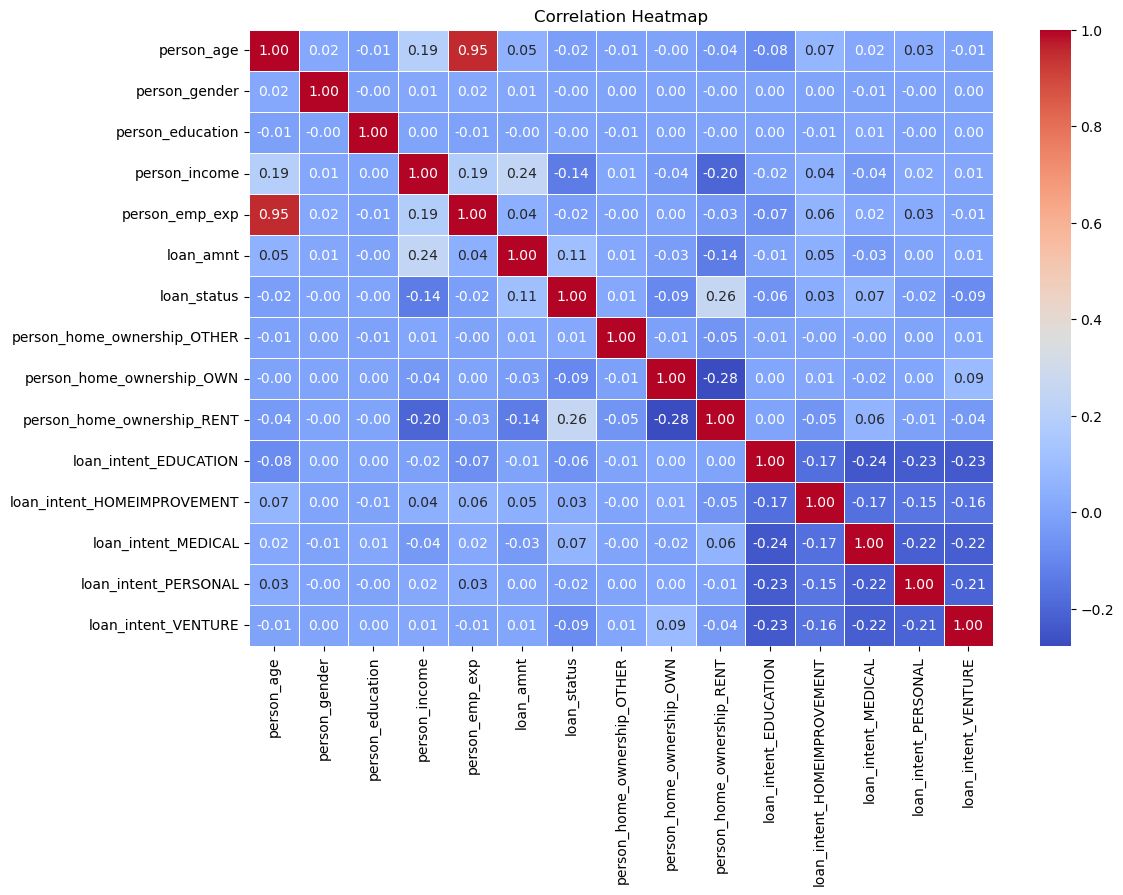

In [22]:
# Plot heatmap to visualize correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [23]:
y = dummy['loan_status']
x = dummy.drop(columns=['loan_status'])

In [24]:
x

,person_age,person_gender,person_education,person_income,person_emp_exp,loan_amnt,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,22.0,0,4,71948.0,0,35000.0,False,False,True,False,False,False,True,False
1,21.0,0,3,12282.0,0,1000.0,False,True,False,True,False,False,False,False
2,25.0,0,3,12438.0,3,5500.0,False,False,False,False,False,True,False,False
3,23.0,0,1,79753.0,0,35000.0,False,False,True,False,False,True,False,False
4,24.0,1,4,66135.0,1,35000.0,False,False,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,1,0,47971.0,6,15000.0,False,False,True,False,False,True,False,False
44996,37.0,0,0,65800.0,17,9000.0,False,False,True,False,True,False,False,False
44997,33.0,1,0,56942.0,7,2771.0,False,False,True,False,False,False,False,False
44998,29.0,1,1,33164.0,4,12000.0,False,False,True,True,False,False,False,False


In [25]:
y

0        1
1        0
2        1
3        1
4        1
        ..
44995    1
44996    1
44997    1
44998    1
44999    1
Name: loan_status, Length: 45000, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(x, y, test_size=0.3,random_state=10)

In [27]:
scaler = StandardScaler()
trainX_scaled = scaler.fit_transform(trainX)
testX_scaled = scaler.transform(testX)

In [28]:
from sklearn.svm import SVC
model = SVC(kernel='rbf')
model.fit(trainX_scaled, trainY)

SVC()

In [29]:
y_pred = model.predict(testX_scaled)

In [30]:
# Evaluate the model
accuracy = accuracy_score(testY, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 83.87%


In [31]:
report = classification_report(testY, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.84      0.99      0.90     10503
           1       0.87      0.32      0.47      2997

    accuracy                           0.84     13500
   macro avg       0.85      0.65      0.69     13500
weighted avg       0.84      0.84      0.81     13500



In [32]:
cm = confusion_matrix(testY, y_pred)
print(cm)

[[10357   146]
 [ 2032   965]]


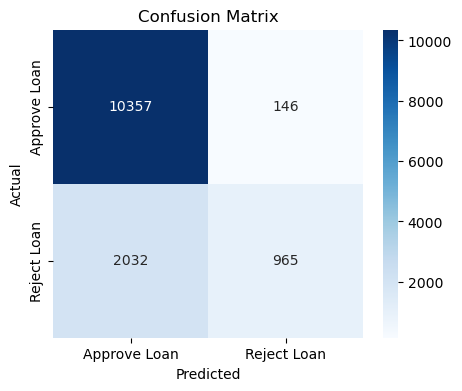

In [33]:
# Plot confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Approve Loan", "Reject Loan"], yticklabels=["Approve Loan", "Reject Loan"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(trainX_scaled, trainY)

C:\Users\parma\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [35]:
y_pred = model.predict(testX_scaled)

In [36]:
# Evaluate the model
accuracy = accuracy_score(testY, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 82.55%


In [37]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()
model.fit(trainX_scaled, trainY)

DecisionTreeClassifier()

In [38]:
y_pred = model.predict(testX_scaled)
# Evaluate the model
accuracy = accuracy_score(testY, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 83.13%


In [39]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(trainX_scaled, trainY)

GaussianNB()

In [40]:
# Make predictions
y_pred = model.predict(testX_scaled)

accuracy = accuracy_score(testY, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 69.64%


In [41]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=200,max_depth=60,min_samples_split=20
                              )
model.fit(trainX_scaled, trainY)

RandomForestClassifier(max_depth=60, min_samples_split=20, n_estimators=200)

In [42]:
y_pred = model.predict(testX_scaled)
# Evaluate the model
accuracy = accuracy_score(testY, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 87.43%


In [43]:
import joblib

# Save the model and scaler
joblib.dump(model, 'loan_classification_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [44]:
print("Model and scaler saved successfully!")

Model and scaler saved successfully!
